In [95]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

### Set session info and path

In [96]:
animal_name='JC315'
date='20240406'

basedir = "/mnt/adata11/"
mbasedir="/adata_pool/merged/"+animal_name+'-'+date+'/'

basename = animal_name+'-'+date

### Import metadata

In [97]:
session_metadata = {}
with open('session_metadata.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file, delimiter=";")    
    for line in reader:
        session_id = line.pop('session_id')
        session_metadata[session_id] = line
        
print('Metadata for',basename)
session_metadata[basename]

Metadata for JC315-20240406


{'num_tetr': '32',
 'last_pfc_left': '8',
 'last_pfc_right': '16',
 'session_names': "['presleep','training1','intersleep','training2','postsleep']",
 'session_idx': '[[1],[2],[3,4,5],[6],[7]]',
 'reward_arms': '7,2',
 'rewards': 'C,S'}

### Set sampling rate and adjust imported metadata

In [98]:
sample_rate_res_old=24000
sample_rate_res=20000
sample_rate_eeg=1250
downsampled_res=sample_rate_res/sample_rate_res_old

num_tetrodes = int(session_metadata[basename]['num_tetr'])
session_names = eval(session_metadata[basename]['session_names'])
num_channels = 128

### Import and merge swr files

In [99]:
sw_merged = []

for ii in range(len(session_names)):
    sw_file = np.loadtxt(mbasedir+basename+'_'+session_names[ii]+'.sw',dtype=int)
    sw_merged.append(sw_file)
    
sw_merged = np.vstack(sw_merged)

### Import and merge eeg files

In [124]:
def find_files_with_eeg(directory):
    eeg_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.eeg'):
                eeg_files.append(os.path.join(root, file))
                
    return eeg_files

In [125]:
eeg_files=sorted(find_files_with_eeg(mbasedir))

In [126]:
eeg_merged=np.fromfile(eeg_files[0], dtype=np.int16)
print('Reshaping',eeg_files[0],'from length',eeg_merged.shape)
eeg_merged= eeg_merged.reshape(int(len(eeg_merged)/num_channels),num_channels)
print('New eeg_merged shape:',eeg_merged.shape)

Reshaping /adata_pool/merged/JC315-20240406/JC315-20240406_intersleep.eeg from length (573687936,)
New eeg_merged shape: (4481937, 128)


In [127]:
eeg=np.fromfile(eeg_files[0], dtype=np.int16)

In [135]:
print('eeg_merged shape:',eeg_merged.shape)
print('sw_merged shape:',sw_merged.shape)

eeg_merged shape: (4481937, 128)
sw_merged shape: (6925, 3)


In [138]:
# load the session timestamps and downsample them
session_timestamps=np.loadtxt(basedir+"processing/"+animal_name+'/'+date+'/'+'session_shifts.txt')

session_timestamps=np.append([0],session_timestamps) # start the first timestamp at 0
session_timestamps_down=session_timestamps*downsampled_res
print('Resampled session timestamps:',session_timestamps_down)

Resampled session timestamps: [0.00000000e+00 7.20001225e+07 1.17216620e+08 1.55038118e+08
 1.55875740e+08 1.88927612e+08 2.32498860e+08 3.04498982e+08]


In [147]:
sw_merged

array([[   1771,    1813,    1898],
       [   7149,    7173,    7208],
       [   8075,    8108,    8159],
       ...,
       [4459414, 4459446, 4459476],
       [4464855, 4464920, 4464981],
       [4481724, 4481753, 4481775]])

4


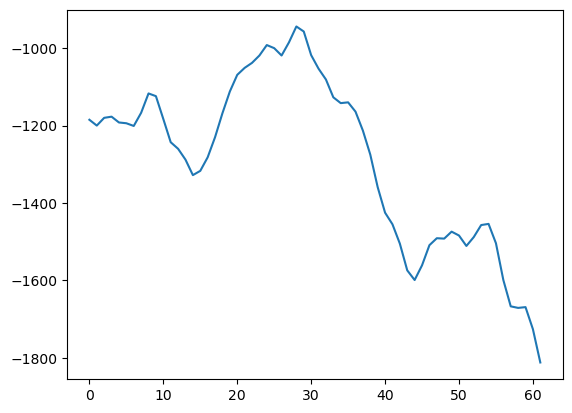

In [158]:
tetrode=1
channel=(tetrode*4)
print(channel)
channel=8

plt.plot(eeg_merged[4459414:4459476,channel])